In [1]:
%cd /data/bruingjde/on-going/SNAM2021-code/

import src
import pandas as pd

/data/bruingjde/on-going/SNAM2021-code


In [8]:
src.predict('data/01/+000', random_state=31)

0.9054474083691345

In [8]:
src.predict('data/18/+020')

0.9093071930264641

# Calculate performance

In [3]:
I = [predict(i, feature_set='I') for i in tqdm(np.arange(1, 31))]

  0%|          | 0/30 [00:00<?, ?it/s]

In [3]:
II_A = [predict(i, feature_set='II-A') for i in tqdm(np.arange(1, 31))]

  0%|          | 0/30 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'data/01/features'

In [5]:
II_B = [predict(i, feature_set='II-B') for i in tqdm(np.arange(1, 31))]

  0%|          | 0/30 [00:00<?, ?it/s]

In [6]:
III = [predict(i, feature_set='III') for i in tqdm(np.arange(1, 31))]

  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
def get_stats(i):
  edgelist = (
    pd.read_pickle(f'data/{i:02}/edgelist.pkl')
    .loc[lambda x: x['source'] != x['target']]
  )
  G = nx.Graph(edgelist)
  return {
    'nodes': G.number_of_nodes(),
    'events per edge': len(edgelist) / G.number_of_edges()
  }

In [8]:
stats = ProgressParallel(n_jobs=30, total=30)(
  joblib.delayed(get_stats)(i) for i in np.arange(1, 31)
)

  0%|          | 0/30 [00:00<?, ?it/s]

In [31]:
t = df.assign(I=I, II_A=II_A, II_B=II_B, III=III)

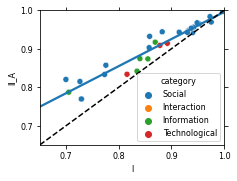

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
fontsize=8
rc = {
  'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,2.475), 
  'axes.titlesize': fontsize, 
  'axes.labelsize': fontsize, 
  'xtick.labelsize': fontsize, 
  'ytick.labelsize': fontsize, 
  'legend.fontsize': fontsize, 
  'legend.title_fontsize': fontsize,
}

with plt.rc_context(rc):
  ax = sns.regplot(data=t, x='I', y='II_A', ci=None, scatter=False)
  sns.scatterplot(data=t, x='I', y='II_A', hue='category', ax=ax)
  ax.set_xlim(.65, 1)
  ax.set_ylim(.65, 1)
  ax.axline((0,0), (1,1), ls='--', c='black')

# Used features

In [10]:
predict(18, feature_set='I', verbose=True)

['aa.npy', 'cn.npy', 'jc.npy', 'pa.npy', 'sp.npy']


0.9377510688069695

In [11]:
predict(18, feature_set='II-A', verbose=True)

['aa.npy', 'aa_exp_m0.npy', 'aa_exp_m1.npy', 'aa_exp_m2.npy', 'aa_exp_m3.npy', 'aa_exp_m4.npy', 'aa_exp_q0.npy', 'aa_exp_q100.npy', 'aa_exp_q25.npy', 'aa_exp_q50.npy', 'aa_exp_q75.npy', 'aa_lin_m0.npy', 'aa_lin_m1.npy', 'aa_lin_m2.npy', 'aa_lin_m3.npy', 'aa_lin_m4.npy', 'aa_lin_q0.npy', 'aa_lin_q100.npy', 'aa_lin_q25.npy', 'aa_lin_q50.npy', 'aa_lin_q75.npy', 'aa_sqrt_m0.npy', 'aa_sqrt_m1.npy', 'aa_sqrt_m2.npy', 'aa_sqrt_m3.npy', 'aa_sqrt_m4.npy', 'aa_sqrt_q0.npy', 'aa_sqrt_q100.npy', 'aa_sqrt_q25.npy', 'aa_sqrt_q50.npy', 'aa_sqrt_q75.npy', 'cn.npy', 'cn_exp_m0.npy', 'cn_exp_m1.npy', 'cn_exp_m2.npy', 'cn_exp_m3.npy', 'cn_exp_m4.npy', 'cn_exp_q0.npy', 'cn_exp_q100.npy', 'cn_exp_q25.npy', 'cn_exp_q50.npy', 'cn_exp_q75.npy', 'cn_lin_m0.npy', 'cn_lin_m1.npy', 'cn_lin_m2.npy', 'cn_lin_m3.npy', 'cn_lin_m4.npy', 'cn_lin_q0.npy', 'cn_lin_q100.npy', 'cn_lin_q25.npy', 'cn_lin_q50.npy', 'cn_lin_q75.npy', 'cn_sqrt_m0.npy', 'cn_sqrt_m1.npy', 'cn_sqrt_m2.npy', 'cn_sqrt_m3.npy', 'cn_sqrt_m4.npy', 'cn_

0.9533919496652415

In [12]:
predict(18, feature_set='II-B', verbose=True)

['aa.npy', 'aa_exp_q100.npy', 'aa_lin_q100.npy', 'aa_sqrt_q100.npy', 'cn.npy', 'cn_exp_q100.npy', 'cn_lin_q100.npy', 'cn_sqrt_q100.npy', 'jc.npy', 'jc_exp_q100.npy', 'jc_lin_q100.npy', 'jc_sqrt_q100.npy', 'pa.npy', 'pa_exp_q100.npy', 'pa_lin_q100.npy', 'pa_sqrt_q100.npy', 'sp.npy']


0.9582318302815197

In [13]:
predict(18, feature_set='III', verbose=True)

['aa.npy', 'cn.npy', 'jc.npy', 'na_exp_m0_diff.npy', 'na_exp_m0_max.npy', 'na_exp_m0_min.npy', 'na_exp_m0_sum.npy', 'na_exp_m1_diff.npy', 'na_exp_m1_max.npy', 'na_exp_m1_min.npy', 'na_exp_m1_sum.npy', 'na_exp_m2_diff.npy', 'na_exp_m2_max.npy', 'na_exp_m2_min.npy', 'na_exp_m2_sum.npy', 'na_exp_m3_diff.npy', 'na_exp_m3_max.npy', 'na_exp_m3_min.npy', 'na_exp_m3_sum.npy', 'na_exp_m4_diff.npy', 'na_exp_m4_max.npy', 'na_exp_m4_min.npy', 'na_exp_m4_sum.npy', 'na_exp_q0_diff.npy', 'na_exp_q0_max.npy', 'na_exp_q0_min.npy', 'na_exp_q0_sum.npy', 'na_exp_q100_diff.npy', 'na_exp_q100_max.npy', 'na_exp_q100_min.npy', 'na_exp_q100_sum.npy', 'na_exp_q25_diff.npy', 'na_exp_q25_max.npy', 'na_exp_q25_min.npy', 'na_exp_q25_sum.npy', 'na_exp_q50_diff.npy', 'na_exp_q50_max.npy', 'na_exp_q50_min.npy', 'na_exp_q50_sum.npy', 'na_exp_q75_diff.npy', 'na_exp_q75_max.npy', 'na_exp_q75_min.npy', 'na_exp_q75_sum.npy', 'na_lin_m0_diff.npy', 'na_lin_m0_max.npy', 'na_lin_m0_min.npy', 'na_lin_m0_sum.npy', 'na_lin_m1_dif

0.9728966685488425

# Robustness

In [14]:
[predict(12, 'I', random_state=random_state) for random_state in range(10)]

[0.7216327379809231,
 0.7336134453781512,
 0.7294993473952206,
 0.7302365054202494,
 0.720031684562577,
 0.7327583445448139,
 0.738697705802969,
 0.7054931515617,
 0.7161839999999999,
 0.6631819928278688]

In [15]:
[predict(12, 'II-A', random_state=random_state) for random_state in range(10)]

[0.8340455156520069,
 0.8306842737094837,
 0.8304677806603393,
 0.786232406206466,
 0.8111408042758157,
 0.8400762380677815,
 0.8393981749244906,
 0.8331893241167434,
 0.811712,
 0.7934650358606556]

In [16]:
[predict(12, 'II-B', random_state=random_state) for random_state in range(10)]

[0.7824883170091543,
 0.7561904761904762,
 0.768333360189497,
 0.7712926934716818,
 0.7532764718119409,
 0.7773399961560639,
 0.7958196773986248,
 0.7652329749103943,
 0.7416320000000001,
 0.7299804687500001]

In [17]:
[predict(12, 'III', random_state=random_state) for random_state in range(10)]

[0.8791530631841751,
 0.888499399759904,
 0.8777614850384312,
 0.8673520039711134,
 0.8617560928773744,
 0.8823435197642386,
 0.8888728230833495,
 0.8629352278545827,
 0.869728,
 0.8255795338114753]